In [1]:
from manim import *
from selma.graph import *
from selma.datastructures import *
import networkx as nx


In [2]:
import re

corpus = """
Twinkle twinkle, little star,
How I wonder what you are!
Up above the world so high,
Like a diamond in the sky.
"""

corpus = """
This text is short. 
This is a short text. 
A short text is a simple example. 
This simple text is short. 
This short example is just a text.
"""

res = []
words_list = re.findall(r'\b\w+\b', corpus.lower())
edges_list = list((s, t) for s, t in zip(words_list, words_list[1:]))
edges = set(edges_list)
words = set(words_list)

In [3]:
G = nx.DiGraph()
for s, t in edges:
  G.add_edge(s, t)

In [4]:
layout = gvlayout_factory('dot', heightscale=.6)
pos = {node: (pos[0], pos[1]) for node, pos in layout(G).items()}

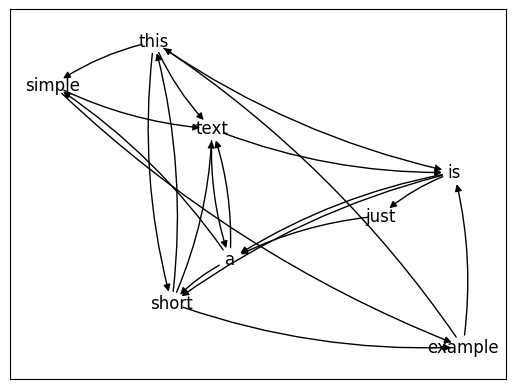

In [5]:
nx.draw_networkx_edges(G, pos, edge_color='black', connectionstyle='arc3,rad=0.1')
nx.draw_networkx_labels(G, pos);

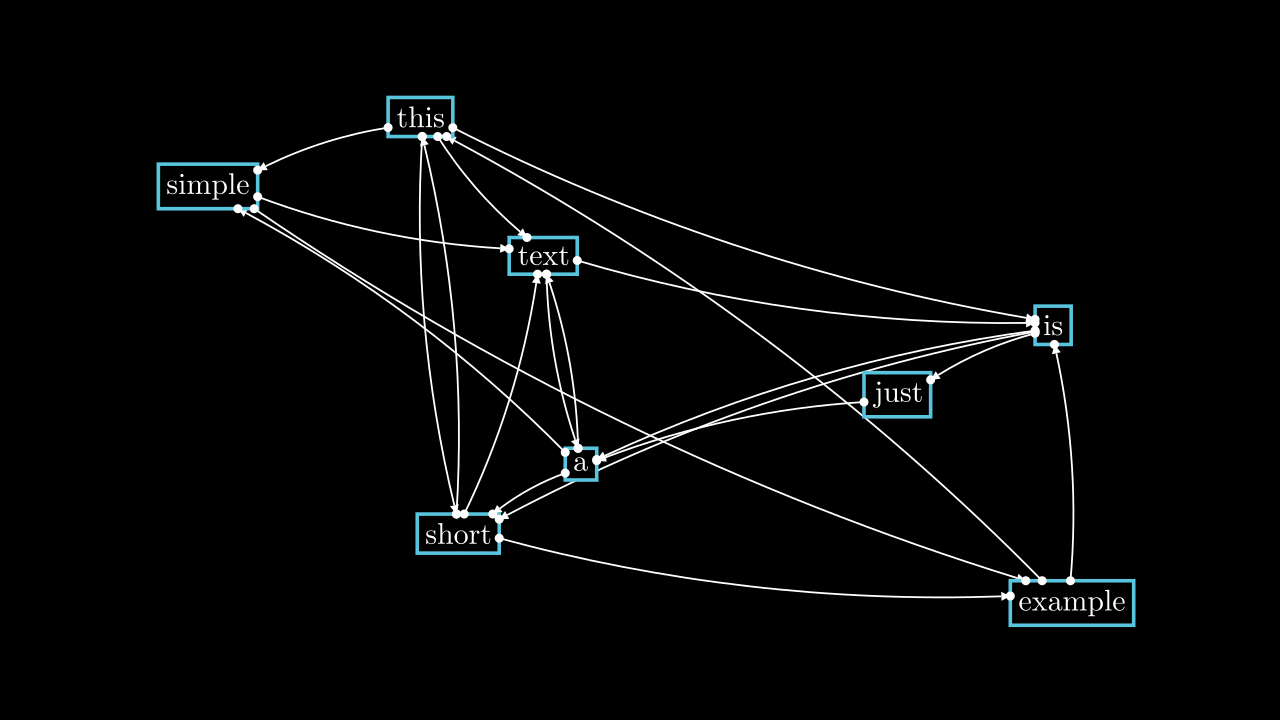

In [13]:
%%manim --hide-splash -qm -v WARNING GraphScene

class GraphScene(Scene):
  def construct(self):
    Q = MQueue()
    #self.add(Q.rect.scale(.8).to_edge(UP))
    MG = MGraph(G, layout)
    self.add(MG.mnodes()) #.scale(1).move_to(DOWN/2))
    self.add(MG.medges())#.scale(1).move_to(DOWN/2))   
    
    for d in MG.iss:
      self.add(Dot(d, radius=.05))
    #self.play(MG.medge('this', 'is').copy().animate.set_stroke(width=5), run_time=0.3)
    
    #Q.enqueue(MG.mnode('this').copy()).play(self)
    
    # self.add(MG.mnode('this')[1].set_fill(color=ORANGE, opacity=.4))
    # for edge in G.out_edges('this'):
    #   self.add(MG.medge(*edge).set_color(ORANGE))
      
      
      
    # w = {(s,t): 1 for s, t in G.edges}
    # for s, t in G.edges:
    #   e = MG.medge(s, t).copy()
    #   dot = Dot(MG.mnode(s).get_center(), color=YELLOW)
    #   self.play(MoveAlongPath(dot, e, run_time=0.3))
    #   self.remove(dot)
    #   w[(s, t)] += 2
    #   self.play(Indicate(MG.mnode(t)), e.animate.set_stroke(width=w[(s, t)]), run_time=0.3)

In [7]:
G.out_edges('short')

OutEdgeDataView([('short', 'this'), ('short', 'example'), ('short', 'text')])